In [105]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import os

In [106]:
filename = 'firstrun.csv'
x, y = np.loadtxt(filename,skiprows=1, delimiter=',', unpack=True)
name = os.path.splitext(filename)[0]

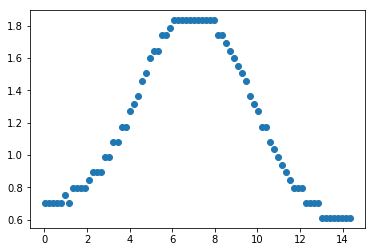

In [107]:
plt.plot(x,y, 'o')

In [108]:
def fitfunc(x, A, λ, x0, y0):
    return A * 1/np.cosh((x-x0)/λ)**2 + y0

In [109]:
Aguess = max(y)
λguess = x[2*len(x)//3] - x[len(x)//3]
x0guess = np.mean(x)
y0guess = min(y)
p0 = [Aguess,λguess,x0guess,y0guess]

In [110]:
p, pcov = opt.curve_fit(fitfunc, x, y, p0=p0)

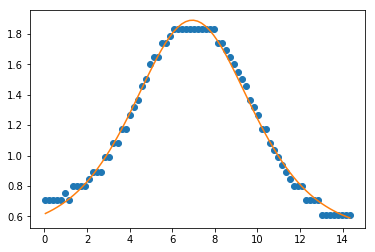

In [111]:
plt.plot(x, y, 'o')
plt.plot(x, fitfunc(x, *p))
plt.savefig(name +'.png', bbox_inches = 'tight')

In [112]:
print(p)

[1.3974739  3.68733948 6.94325973 0.49226962]


In [113]:
dp = np.sqrt(np.diag(pcov))
print(dp)

[0.01663112 0.07090406 0.02164054 0.01770358]


In [114]:
#new_path = '/users/RobertBurry/Desktop/Winter 2019/P3900/Lab #3/Rob Internal Wave/data.txt'

In [135]:
data = open(name+'.txt','w')
data.writelines('p \t dp \n')

In [136]:
np.savetxt(name+'.txt', np.transpose([p,dp]))

In [138]:
data.close()